In [1]:
import os,cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras import backend as K
#K.set_image_dim_ordering('th')

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD,RMSprop,adam
import pandas as pd
import csv
from os.path import splitext
from sklearn.preprocessing import LabelEncoder
from PIL import Image

Using TensorFlow backend.


# CNN with 1 Convolutional Layer


In [3]:
# Load training and test data into dataframes
PATH = os.getcwd()
from keras.utils import to_categorical
df = pd.read_csv(PATH + '\\CNN-image-dataset.csv');
data_train = df[0:5000]
data_test = df[5001:]

# X forms the training images, and y forms the training labels
X = np.array(data_train.iloc[:, 2:])
y = to_categorical(np.array(data_train.iloc[:, 1]))

# Here I split original training data to sub-training (80%) and validation data (20%)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=13)

# X_test forms the test images, and y_test forms the test labels
X_test = np.array(data_test.iloc[:, 2:])
y_test = to_categorical(np.array(data_test.iloc[:, 1]))

In [4]:
# Each image's dimension is 28 x 28
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)

# Prepare the training images
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_train = X_train.astype('float32')
X_train /= 255

# Prepare the test images
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
X_test = X_test.astype('float32')
X_test /= 255

# Prepare the validation images
X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 1)
X_val = X_val.astype('float32')
X_val /= 255

In [5]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)
print(y_val.shape)

(4000, 28, 28, 1)
(5000, 28, 28, 1)
(1000, 28, 28, 1)
(1000, 3)


In [6]:
# Import Keras libraries
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

cnn1 = Sequential()
cnn1.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
cnn1.add(MaxPooling2D(pool_size=(2, 2)))
cnn1.add(Dropout(0.2))

cnn1.add(Flatten())

cnn1.add(Dense(128, activation='relu'))
cnn1.add(Dense(3, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [7]:
cnn1.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [8]:
history1 = cnn1.fit(X_train, y_train, batch_size=256 , nb_epoch=50, verbose=1, validation_data=(X_val, y_val))

Instructions for updating:
Use tf.cast instead.


C:\Users\rohit\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 4000 samples, validate on 1000 samples
Epoch 1/50
4000/4000 [==============================] - 5s 1ms/step - loss: 0.8437 - acc: 0.7487 - val_loss: 0.6126 - val_acc: 0.8130
Epoch 2/50
4000/4000 [==============================] - 3s 628us/step - loss: 0.6456 - acc: 0.7900 - val_loss: 0.5915 - val_acc: 0.8130
Epoch 3/50
4000/4000 [==============================] - 3s 644us/step - loss: 0.6339 - acc: 0.7900 - val_loss: 0.5929 - val_acc: 0.8130
Epoch 4/50
4000/4000 [==============================] - 3s 653us/step - loss: 0.6307 - acc: 0.7900 - val_loss: 0.5967 - val_acc: 0.8130
Epoch 5/50
4000/4000 [==============================] - 3s 656us/step - loss: 0.6265 - acc: 0.7900 - val_loss: 0.5843 - val_acc: 0.8130
Epoch 6/50
4000/4000 [==============================] - 3s 657us/step - loss: 0.6196 - acc: 0.7900 - val_loss: 0.5838 - val_acc: 0.8130
Epoch 7/50
4000/4000 [==============================] - 3s 662us/step - loss: 0.6130 - acc: 0.7900 - val_loss: 0.5703 - val_acc: 0.8130
Ep

In [9]:
score1 = cnn1.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score1[0])
print('Test accuracy:', score1[1])

Test loss: 0.03423081789463758
Test accuracy: 0.9928


50


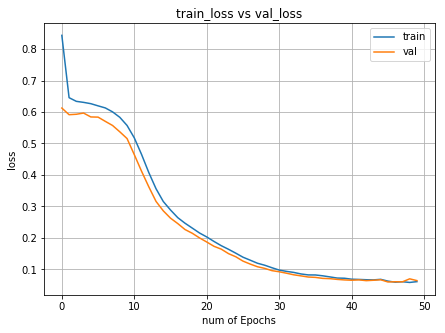

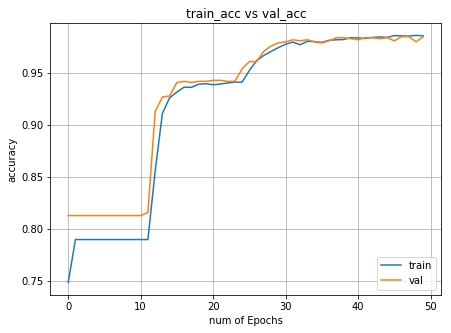

In [10]:
# visualizing losses and accuracy
train_loss=history1.history['loss']
val_loss=history1.history['val_loss']
train_acc=history1.history['acc']
val_acc=history1.history['val_acc']
xc=range(50)
print(len(train_loss))
plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
#plt.style.use(['classic'])

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)

In [11]:
# get the predictions for the test data
predicted_classes = cnn1.predict_classes(X_test)

# get the indices to be plotted
y_true = data_test.iloc[:, 1].values
correct = np.nonzero(predicted_classes==y_true)[0]
incorrect = np.nonzero(predicted_classes!=y_true)[0]

In [12]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(3)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.99      1.00      1.00      3674
     Class 1       1.00      1.00      1.00      1039
     Class 2       0.99      0.90      0.94       287

   micro avg       0.99      0.99      0.99      5000
   macro avg       0.99      0.97      0.98      5000
weighted avg       0.99      0.99      0.99      5000



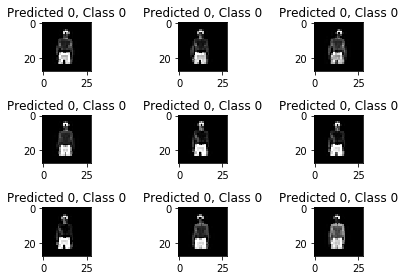

In [13]:
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_true[correct]))
    plt.tight_layout()

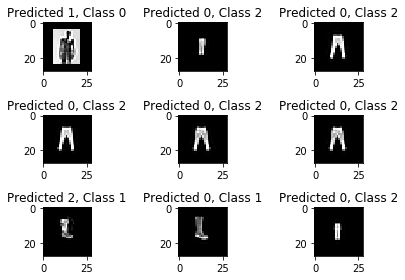

In [14]:

for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_true[incorrect]))
    plt.tight_layout()